## Pre-processamento de Dados ##

### Técnicas de processamento de Dados - Discretização

##### importando a biblioteca pandas

In [1]:
import pandas as pd

##### cojunto de dados de exemplo

In [2]:
altura = [1.50,1.57,1.62,1.70,1.85,1.90]

##### aplicando a discretização em 3 bins de tamanho igual e com os labels P, M e G

In [3]:
altura = pd.qcut(altura,3,labels=['P','M','G'])#bins:objetos unicos.

In [4]:
print(altura)

[P, P, M, M, G, G]
Categories (3, object): [P < M < G]


##### verificando a quantidade de objetos em cada bin

In [5]:
altura.value_counts()

P    2
M    2
G    2
dtype: int64

##### lendo a base de dados

In [6]:
dataset = pd.read_csv('kc_house_data.csv')


##### contando o número de pisos

In [7]:
dataset['floors'].value_counts()

1.0    10679
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

##### discretizando os valores do atributo floors e armazenando o resultado no atributo floors_labels

In [8]:
dataset['floors_labels'] = pd.cut(
    dataset['floors'],
    5,
    labels=['Muito-Pequeno','Pequeno','Medio','Grande','Muito-Grande']
)

##### verificando o novo atributo

In [9]:
dataset.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,floors_labels
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Muito-Pequeno
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Pequeno
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Muito-Pequeno
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Muito-Pequeno
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Muito-Pequeno
5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,Muito-Pequeno
6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,Pequeno
7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,Muito-Pequeno
8,2414600126,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,Muito-Pequeno
9,3793500160,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,Pequeno


##### verificando os valores únicos do atributo

In [10]:
dataset['floors_labels'].unique()

[Muito-Pequeno, Pequeno, NaN, Grande, Medio, Muito-Grande]
Categories (5, object): [Muito-Pequeno < Pequeno < Medio < Grande < Muito-Grande]

##### contagem de valores em cada bin ou categoria

In [11]:
dataset['floors_labels'].value_counts()

Muito-Pequeno    12589
Pequeno           8241
Grande             613
Medio              161
Muito-Grande         8
Name: floors_labels, dtype: int64

### Técnicas de processamento de Dados - Normalização de dados

##### norma L2 é definida como a raiz quadrada do somatório de todos os elementos do vetor ao quadrado.

![l2-norma](l2-norma.png)

##### vejamos um simples exemplo do calculo da norma l2.

![l2-norma-exemplo](l2-norma-exemplo.png)

##### importando as bibliotecas necessárias.

Tecnica deve ser utilizanda para a implementassão de algoritmos que tem como pre-requisito a utilização de dados com a distribução normal.

In [14]:
import warnings
warnings.filterwarnings('ignore')#Ignorar ao avisos.
from sklearn.preprocessing import Normalizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### alguns dados de exemplo

In [15]:
data = [
    [-1, 2],
    [0.5, 6],
    [0, 10],
    [1, 18]
]
print (data)

[[-1, 2], [0.5, 6], [0, 10], [1, 18]]


#### valor da média

In [16]:
print (np.mean(data))

4.5625


#### visualizando a distribuição dos dados

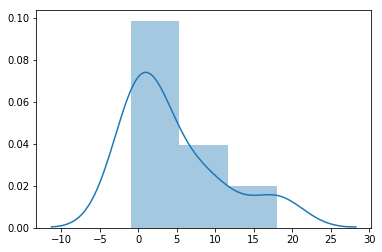

In [17]:
sns.distplot(np.array(data).reshape(-1))#reshape, tranforma o dados para apenas uma dimensão.
plt.show()

##### instanciando o objeto Normalize

In [18]:
normalizer = Normalizer().fit(data) #objeto q esta implementada a forma l2.

##### aplicando a normalização nos dados de exemplo utilizando a norma l2

In [19]:
data2 = normalizer.transform(data)
print(data2)

[[-0.4472136   0.89442719]
 [ 0.08304548  0.99654576]
 [ 0.          1.        ]
 [ 0.05547002  0.99846035]]


#### Alterando a forma dos dados para apenas uma dimensão

In [21]:
data2 = data2.reshape(-1)
print(data2)

[-0.4472136   0.89442719  0.08304548  0.99654576  0.          1.
  0.05547002  0.99846035]


#### valor da média

In [22]:
print(np.mean(data2))

0.4475919008033141


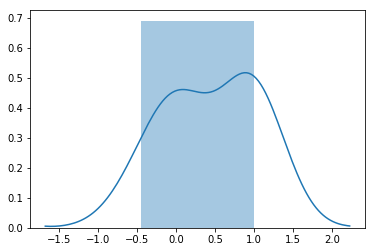

In [23]:
sns.distplot(data2)
plt.show()

### Técnicas de pre-processamento de Dados - Standartization (Padronização)

Utilizada para classificadores que utilizam principalmente métodos de instância, onde assumem que não possue valor discrepantes entre as features. Como features com valor de cm e outras em m.

In [30]:
data = np.random.normal(size = 50)
print(data)

[-0.03695633  1.29603273  0.46094613 -0.08697915 -2.63988056 -0.54684187
 -0.19186394 -1.08637853  0.59948357 -0.25695714 -1.30413105  0.74175476
  0.59301843  0.86021533 -0.5527221  -0.23860349 -1.22217204  0.79264565
 -0.9259261   1.0165007   1.23760007 -0.22793377 -0.94557128  0.67414792
  0.58384223 -2.30742824  0.32320974 -1.37934063 -0.14917992 -0.65997877
 -0.35208418  0.15101697  1.25410132 -0.14097647  0.05830631 -1.56615838
  0.00345818  0.18043112  1.07434268 -0.76407622 -0.35967846 -0.53224409
  1.23961349  0.62340859  0.43704235  1.40673649  1.28817421 -2.38662206
  1.55178952  0.38585427]


#### Alterando a forma dos dados para apenas uma dimensão

In [34]:
data = data.reshape(-1,1)
print(data)

[[-0.03695633]
 [ 1.29603273]
 [ 0.46094613]
 [-0.08697915]
 [-2.63988056]
 [-0.54684187]
 [-0.19186394]
 [-1.08637853]
 [ 0.59948357]
 [-0.25695714]
 [-1.30413105]
 [ 0.74175476]
 [ 0.59301843]
 [ 0.86021533]
 [-0.5527221 ]
 [-0.23860349]
 [-1.22217204]
 [ 0.79264565]
 [-0.9259261 ]
 [ 1.0165007 ]
 [ 1.23760007]
 [-0.22793377]
 [-0.94557128]
 [ 0.67414792]
 [ 0.58384223]
 [-2.30742824]
 [ 0.32320974]
 [-1.37934063]
 [-0.14917992]
 [-0.65997877]
 [-0.35208418]
 [ 0.15101697]
 [ 1.25410132]
 [-0.14097647]
 [ 0.05830631]
 [-1.56615838]
 [ 0.00345818]
 [ 0.18043112]
 [ 1.07434268]
 [-0.76407622]
 [-0.35967846]
 [-0.53224409]
 [ 1.23961349]
 [ 0.62340859]
 [ 0.43704235]
 [ 1.40673649]
 [ 1.28817421]
 [-2.38662206]
 [ 1.55178952]
 [ 0.38585427]]


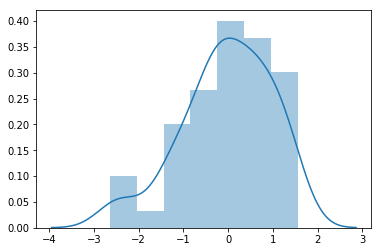

In [35]:
sns.distplot(data)
plt.show()

##### importando as bibliotecas necessárias.

In [32]:
from sklearn.preprocessing import MinMaxScaler

##### instânciando o objeto scaler

In [36]:
scaler = MinMaxScaler().fit(data)

##### transformando os dados com o objeto scaler

In [37]:
data_scaled = scaler.transform(data)
print(data_scaled)#max:1 - min:0

[[0.62097546]
 [0.93898452]
 [0.73975924]
 [0.60904159]
 [0.        ]
 [0.49933288]
 [0.5840194 ]
 [0.37061649]
 [0.7728099 ]
 [0.56849022]
 [0.31866762]
 [0.80675131]
 [0.77126752]
 [0.83501226]
 [0.49793004]
 [0.57286881]
 [0.33822045]
 [0.81889227]
 [0.40889536]
 [0.87229701]
 [0.92504433]
 [0.57541427]
 [0.40420864]
 [0.79062245]
 [0.76907837]
 [0.07931262]
 [0.7068997 ]
 [0.30072499]
 [0.59420245]
 [0.47234199]
 [0.54579591]
 [0.66581994]
 [0.92898101]
 [0.59615954]
 [0.64370211]
 [0.25615618]
 [0.63061708]
 [0.67283723]
 [0.88609628]
 [0.44750763]
 [0.54398416]
 [0.50281545]
 [0.92552467]
 [0.77851765]
 [0.73405656]
 [0.96539493]
 [0.93710972]
 [0.06041947]
 [1.        ]
 [0.7218447 ]]


#### Alterando a forma dos dados para apenas uma dimensão

In [38]:
data_scaled = data_scaled.reshape(-1,1)

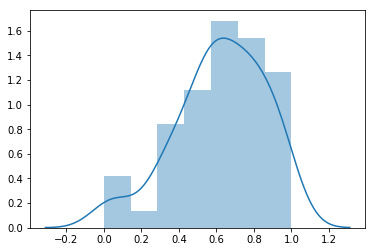

In [39]:
sns.distplot(data_scaled)
plt.show()

# StandardScaler - Técnica de Pré-Processamento

* Padroniza a escala dos dados sem interferir na sua forma

* Mantém a escala dos dados mais fiel que a Técnica MinMaxScale

In [40]:
data = np.random.normal(size = 50)
print(data)

[-4.10953845e-01 -1.87447197e-01  9.67610828e-02  7.17408409e-02
  1.26151266e-01  4.48927823e-01 -1.14155768e+00 -9.37604373e-01
  1.04316076e+00 -2.32314274e-01  8.19468929e-01 -1.16473952e+00
  1.97102057e+00 -2.48070037e-01 -6.49214484e-01  2.62228920e-01
 -1.33174715e-01 -1.36664061e+00 -1.40062763e-03 -3.02806402e-01
 -3.71908309e-01  1.74334481e-01  3.24887358e-01 -1.91416476e+00
 -6.78643707e-01 -1.13505134e+00  1.38545827e+00 -1.36973334e-01
  3.44607059e-01 -6.80486944e-01  1.96527706e-01  1.18076617e+00
 -7.07365394e-01  1.79654859e+00 -1.70776762e+00  1.23582488e+00
  4.59219408e-02 -8.30711694e-01 -4.97045432e-01  4.60496586e-01
  1.86971073e+00 -1.45256462e+00  3.27370587e-01 -4.31148451e-01
  4.68976374e-01 -5.77122841e-01  2.60778153e-01  1.51840576e+00
 -3.85135724e-01 -8.67110959e-01]


#### Alterando a forma dos dados para apenas uma dimensão

In [41]:
data = data.reshape(-1,1)

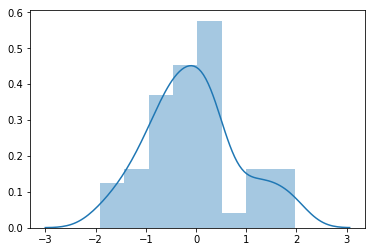

In [42]:
sns.distplot(data)
plt.show()

##### importando as bibliotecas necessárias.

In [43]:
from sklearn.preprocessing import StandardScaler

##### instânciando o objeto scaler

In [44]:
scaler = StandardScaler().fit(data)

##### transformando os dados com o objeto scaler

In [45]:
data_scaled = scaler.transform(data)
print(data_scaled)

[[-0.39500785]
 [-0.14740941]
 [ 0.1674337 ]
 [ 0.13971652]
 [ 0.19999185]
 [ 0.55756051]
 [-1.20436351]
 [-0.97842606]
 [ 1.21584584]
 [-0.19711271]
 [ 0.96804226]
 [-1.23004412]
 [ 2.2437197 ]
 [-0.21456679]
 [-0.65895061]
 [ 0.35073732]
 [-0.08728689]
 [-1.45370814]
 [ 0.05869113]
 [-0.27520319]
 [-0.35175359]
 [ 0.25336874]
 [ 0.42014971]
 [-2.06024994]
 [-0.69155201]
 [-1.19715584]
 [ 1.59503962]
 [-0.09149496]
 [ 0.441995  ]
 [-0.69359393]
 [ 0.27795417]
 [ 1.36828374]
 [-0.72336961]
 [ 2.05044138]
 [-1.83160525]
 [ 1.42927723]
 [ 0.1111146 ]
 [-0.86001142]
 [-0.49037925]
 [ 0.57037627]
 [ 2.13148967]
 [-1.5488939 ]
 [ 0.42290061]
 [-0.41737923]
 [ 0.57977009]
 [-0.57908821]
 [ 0.34913018]
 [ 1.74231752]
 [-0.36640679]
 [-0.90033416]]


#### Alterando a forma dos dados para apenas uma dimensão

In [46]:
data_scaled = data_scaled.reshape(-1,1)

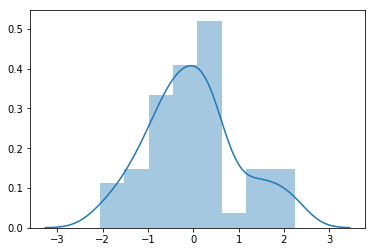

In [47]:
sns.distplot(data_scaled)
plt.show()